In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import basic_functions as bf
import itertools

In [8]:
path = '../namesbystate/'
state = 'merged'
full_path = path+state+'.csv'
data_set = pd.read_csv(full_path)

C:\Users\xning\Documents\ML\Project\ML_Project\basic_functions.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data_set_[data_set_["State"]==state][data_set_["Name"]==name]


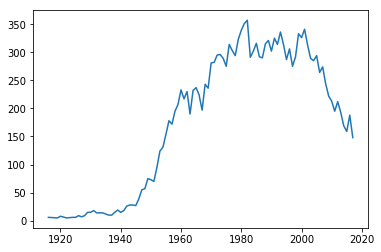

In [65]:
data=bf.get_year("TX","Jaime")
dataF=data[data["Gender"]=="F"]
dataM=data[data["Gender"]=="M"][['Year','Occurence']]
plt.plot(dataM["Year"],dataM["Occurence"])

In [58]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [105]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries["Occurence"].rolling(15).mean()
    rolstd =timeseries["Occurence"].rolling(15).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries["Year"],timeseries["Occurence"], color='blue',label='Original')
    mean = plt.plot(timeseries["Year"],rolmean, color='red', label='Rolling Mean')
    std = plt.plot(timeseries["Year"],rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries["Occurence"], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


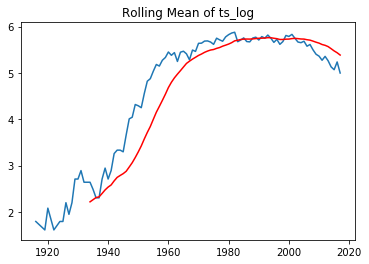

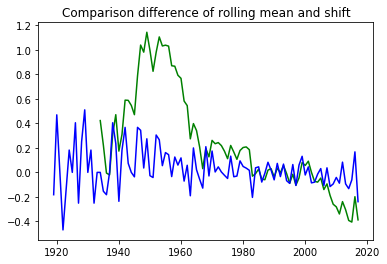

(97, 2)


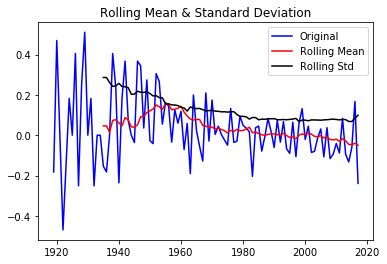

Results of Dickey-Fuller Test:
Test Statistic                 -3.224731
p-value                         0.018597
#Lags Used                      3.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [117]:
ts_log = np.log(dataM["Occurence"])

#Method 1 of removing trend 
moving_avg = ts_log.rolling(15).mean()
plt.plot(dataM["Year"],ts_log)
plt.plot(dataM["Year"],moving_avg, color='red')

plt.title('Rolling Mean of ts_log')
plt.show()

ts_log_moving_avg_diff = ts_log - moving_avg
#ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(dataM["Year"],ts_log_moving_avg_diff, color="green")


#Method 2 IS BETTER
ts_log_diff = ts_log - ts_log.shift()

plt.plot(dataM["Year"],ts_log_diff, color = 'blue')
plt.title('Comparison difference of rolling mean and shift')
plt.show()

#Recreate timeseries with result of method 2
new_ts=pd.concat([dataM["Year"],ts_log_diff],axis=1)
new_ts.dropna(inplace=True)
print(new_ts.shape)

test_stationarity(new_ts)
#Stationnaire avec confiance de 95%

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()